<h1>Capstone Project: Exploratory Data Analysis - Inferential Statistics</h1>

Capstone Project #1: Real Estate Price Predictor <br>
Springboard -- Data Science Career Program <br>
Inferential Statistics -- March 2020 <br>
By Kevin Cole


Learning Objective

Identify variables in the data to answer to a project question.
Identify strong correlations between pairs of independent variables or between an independent and a dependent variable. 
Practice identifying the most appropriate tests to use to analyze relationships between variables.


Initial Proposal https://github.com/ABitNutty/Capstone-1/blob/master/Capstone%201%20Proposal.pdf <br>
Data Wrangling https://github.com/ABitNutty/Capstone-1/blob/master/Data_Wrangling.ipynb <br>
Data Story https://github.com/ABitNutty/Capstone-1/blob/master/DataStory.ipynb <br>


In [1]:
#Import packages to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle

# Imports raw data
data = pd.read_csv('Post_Story_Data.csv', index_col='Id')
data_information = pd.read_csv('data_information.csv', index_col='Column Name')

<h2>Questions posed:</h2>

Does Central Air change the value of the property significantly?<br>
Does an attached garage provide any more value to a home than a detached?<br>
What variables are highly correlated with eachother? <br>

In [2]:
# Bootstrapping tools

np.random.seed(47)
N_rep = 10000

def bootstrap_replicate_1d(data, func):
    """Generate single bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def create_bs_reps_array(data, func, size=1):
    """Creates an array of size input creating bootstrap replicates of function statistic."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

<h2> Investigating the effect of a central air system on sale price </h2>

Null Hypothesis: The mean sale price of central air properties is equal. <br>
Alternative Hypothesis: The mean sale price is different for the two populations. 

In [3]:
# Separating properties into respective Datafames
central_air = data[data.CentralAir == 'Y']
other_air = data[data.CentralAir == 'N']

# Calculating means from sample
central_mean = central_air.SalePrice.mean()
other_air_mean = other_air.SalePrice.mean()
combined_mean = data.SalePrice.mean()

print('Mean sale price for properties with central air: ' + str(central_mean))
print('Mean sale price for properties with other air: ' + str(other_air_mean))
print('')
print('The observed difference in means is ' + str(round(central_mean-other_air_mean)) +
      ' and we are testing to determine if this difference is significant.')


Mean sale price for properties with central air: 186186.7098901099
Mean sale price for properties with other air: 105264.07368421053

The observed difference in means is 80923 and we are testing to determine if this difference is significant.


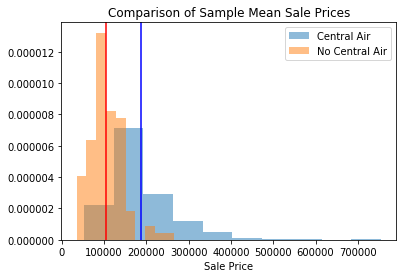

In [4]:
# Creating histogram of sale prices over the two populations
plt.hist(central_air.SalePrice, density=True, alpha=0.5, label='Central Air')
plt.hist(other_air.SalePrice, density=True, alpha=0.5, label='No Central Air')
plt.axvline(central_mean ,color='b')
plt.axvline(other_air_mean ,color='r')
plt.legend()
plt.xlabel('Sale Price')
plt.title('Comparison of Sample Mean Sale Prices')
plt.show()

In [5]:
# Creating shifted charges arrays
central_air_shifted = central_air.SalePrice - central_mean + combined_mean
other_air_shifted = other_air.SalePrice - other_air_mean + combined_mean

# Creating bootstrap samples
bs_central_air_mean = create_bs_reps_array(central_air_shifted, np.mean, size=10000)
bs_other_air_mean = create_bs_reps_array(other_air_shifted, np.mean, size=10000)

# Bootstraped replicates of difference of means
bs_difference = bs_central_air_mean - bs_other_air_mean

# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= combined_mean) / len(bs_difference)
print('p-value =', p)

p-value = 0.0


<h2> Conclusion: Central Air </h2>

There were no instances of events at least as extreme as the sample we observed. We reject the null hypothesis and accept that the difference in means in the two populations is statistically significant.

<h2> Investigating the affect of an attached garage</h2>

Null Hypothesis: The mean sale price of attached garages is equal to that of detached garages. <br>
Alternative Hypothosis: The mean sale price of attached garages is not equal to that of detached garages.

In [6]:
# Separating properties into respective Datafames
attached = data[data.GarageType == 'Attchd']
detached = data[data.GarageType == 'Detchd']

# Calculating means from sample
attached_mean = attached.SalePrice.mean()
detached_mean = detached.SalePrice.mean()
overall_mean = data.SalePrice.mean()

print('Mean sale price for properties with attached garages: ' + str(attached_mean))
print('Mean sale price for properties with detached garages: ' + str(detached_mean))
print('')
print('The observed difference in means is ' + str(round(attached_mean-detached_mean)) +
      ' and we are testing to determine if this difference is significant.')

Mean sale price for properties with attached garages: 202892.65632183908
Mean sale price for properties with detached garages: 134091.16279069768

The observed difference in means is 68801 and we are testing to determine if this difference is significant.


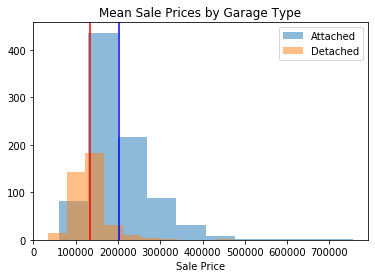

In [7]:
# Creating histogram of Sale prices for two populations
plt.hist(attached.SalePrice, alpha=0.5, label='Attached')
plt.hist(detached.SalePrice, alpha=0.5, label='Detached')
plt.axvline(attached_mean ,color='b')
plt.axvline(detached_mean ,color='r')
plt.legend()
plt.xlabel('Sale Price')
plt.title('Mean Sale Prices by Garage Type')
plt.show()

In [8]:
# Creating shifted  arrays
attached_shifted = attached.SalePrice - attached_mean + overall_mean
detached_shifted = detached.SalePrice - detached_mean + overall_mean

# Creating bootstrap samples
bs_attached_mean = create_bs_reps_array(attached_shifted, np.mean, size=10000)
bs_detached_mean = create_bs_reps_array(detached_shifted, np.mean, size=10000)

# Bootstraped replicates of difference of means
bs_difference = bs_attached_mean - bs_detached_mean

# Find probablity of events at least as extreme as observed
p = np.sum(bs_difference >= combined_mean) / len(bs_difference)
print('p-value =', p)

p-value = 0.0


<h2> Conclusion: Garage Type </h2>

Since there are no instances (and a p-value of 0) of events at least as extreme as the one observed, we reject the null hypothesis and accept that the differece in means observed is statistically significant. 

<h2>Correlation between predictor variables</h2>

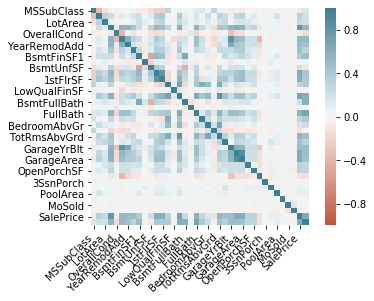

In [9]:
# Creating correlation coefficients
corr = data.corr()

# Heatmap
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

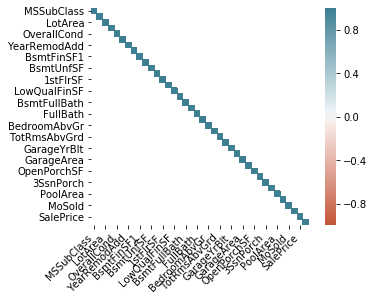

In [10]:
# Looking for variables with extremely strong correlation
corr2 = corr[corr > .9]

# Heatmap
ax = sns.heatmap(corr2, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

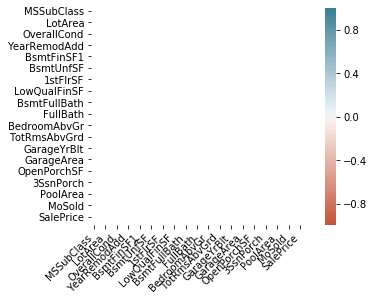

In [11]:
# Looking for resonably strong negative correlation
corr3 = corr[corr < -0.5]

# Heatmap
ax = sns.heatmap(corr3, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

<h4>Note:</h4> From here on out negative correlation will not be analyzed. There are no variable pairs with strong negative correlation. 

In [12]:
# Creating test statistic matrix for correlation
n=38
r=data.corr()
t=r*np.sqrt((n-2)/(1-r*r))

# Finding P-values matrix for correlation test statistics
p_values = stats.t.cdf(t, n-2)

In [13]:
# Turning p_values matrix into dataframe
p = pd.DataFrame(p_values)
p.columns = corr.columns
p.index = corr.index

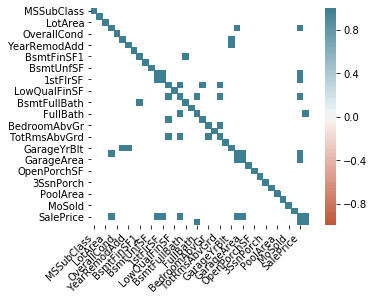

In [14]:
# Creating a mask of variable pairs to analyze based on correlation coefficient 
mask = corr > 0.6

# Heatmap
ax = sns.heatmap(p[mask == True], vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [15]:
# Creating a matrix that meet the mask condition and an alpha < 0.05
# highly_correlated = p[p[mask == True] < 0.05]
highly_correlated = p[p[mask == True] > 0.95]

In [16]:
for column in highly_correlated.columns:
    # Looping through columns looking for p-values that made it through the filter
    
    if highly_correlated[column].sum() > 1:
        # Finding vairable pairs with appropriate P-values
        
        # Printing variable pairs and p-values
        print()
        print(column + ' is highly correlated with:')
        
        for row in list(highly_correlated[column][highly_correlated[column] > 0].index):
            if row != column:
                print(row + ' at a p-value of ' + str(highly_correlated[column][row]) + ' and a pearson coefficient of ' + str(corr[column][row]))



OverallQual is highly correlated with:
GarageCars at a p-value of 0.9999665715923273 and a pearson coefficient of 0.6006707165907189
SalePrice at a p-value of 0.9999999982862906 and a pearson coefficient of 0.7909816005838047

YearBuilt is highly correlated with:
GarageYrBlt at a p-value of 0.9999999999112538 and a pearson coefficient of 0.8256674841743434

YearRemodAdd is highly correlated with:
GarageYrBlt at a p-value of 0.9999930997204749 and a pearson coefficient of 0.6422767797035414

BsmtFinSF1 is highly correlated with:
BsmtFullBath at a p-value of 0.999994816630686 and a pearson coefficient of 0.6492117535742737

TotalBsmtSF is highly correlated with:
1stFlrSF at a p-value of 0.9999999998432137 and a pearson coefficient of 0.8195299750050355
SalePrice at a p-value of 0.999979016493566 and a pearson coefficient of 0.6135805515591944

1stFlrSF is highly correlated with:
TotalBsmtSF at a p-value of 0.9999999998432137 and a pearson coefficient of 0.8195299750050355
SalePrice at a

This analysis suggests that some variables are highly correlated and consideration should be given to dropping them from the model. 

In [18]:
trimmed_data = data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BathroomCount', 'SalePrice']]

'GarageArea' was trimmed as area is a function of how many cars. 'GarageCars' remains. Garage year built is being trimmed as this was very often the same year the house was built or the remodel was done creating high correlations. Multiple basement types and square footage variables were removed in favor of the total basement square feet metric. Individual bathroom variables were removed in favor of the sum of all types in one 'BathroomCount' variable. 2nd floor square feet variable was trimmed as it most often has the same footprint as the floor below it, as well as counting that space in above ground living area as well as bedroom and bathroom counts. 


In [19]:
# Examining trimmed dataset
trimmed_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BathroomCount,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,2,2008,WD,Normal,3.5,208500
2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,No Pool,No Fence,NaN,0,5,2007,WD,Normal,2.5,181500
3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,No Pool,No Fence,NaN,0,9,2008,WD,Normal,3.5,223500
4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml,2.0,140000
5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,No Pool,No Fence,NaN,0,12,2008,WD,Normal,3.5,250000


In [20]:
# Saving off trimmed data
trimmed_data.to_csv('trimmed_data.csv')